In [11]:
#KNN

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

X = df.drop(columns=['Attrition'])
y = df['Attrition']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(x_train, y_train)
y_pred_knn = knn_pipeline.predict(x_test)

def calculate_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    }

knn_metrics = calculate_metrics(y_test, y_pred_knn, 'KNN')

print("\nKNN Performance Metrics:")
for metric, score in knn_metrics.items():
    print(f"{metric}: {score:.2f}")

print("\nClassification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))



KNN Performance Metrics:
Accuracy: 0.85
Precision: 0.41
Recall: 0.11
F1 Score: 0.18
ROC AUC: 0.54

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.41      0.11      0.18        61

    accuracy                           0.85       441
   macro avg       0.64      0.54      0.55       441
weighted avg       0.81      0.85      0.82       441


Confusion Matrix for KNN:
 [[370  10]
 [ 54   7]]


In [13]:
#Decision tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

X = df.drop(columns=['Attrition'])
y = df['Attrition']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth=5, random_state=42))
])

tree_pipeline.fit(x_train, y_train)
y_pred_tree = tree_pipeline.predict(x_test)

def calculate_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    }

tree_metrics = calculate_metrics(y_test, y_pred_tree, 'Decision Tree')

print("\nDecision Tree Performance Metrics:")
for metric, score in tree_metrics.items():
    print(f"{metric}: {score:.2f}")

print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_tree))



Decision Tree Performance Metrics:
Accuracy: 0.85
Precision: 0.39
Recall: 0.20
F1 Score: 0.26
ROC AUC: 0.57

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       441
weighted avg       0.81      0.85      0.82       441


Confusion Matrix for Decision Tree:
 [[361  19]
 [ 49  12]]


In [15]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

X = df.drop(columns=['Attrition'])
y = df['Attrition']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)

print("Random Forest Classifier Performance Metrics:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Performance Metrics:

Accuracy: 0.87
Precision: 0.71
Recall: 0.08
F1 Score: 0.15
ROC AUC Score: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441

Confusion Matrix:
 [[378   2]
 [ 56   5]]


In [21]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode target variable
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Identify feature types
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes pipeline
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('nb', GaussianNB())
])

# Train
nb_pipeline.fit(x_train, y_train)

# Predict
y_pred_nb = nb_pipeline.predict(x_test)

# Evaluate
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_nb):.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Performance:
Accuracy: 0.66
Precision: 0.24
Recall: 0.70
F1 Score: 0.36
ROC AUC Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76       380
           1       0.24      0.70      0.36        61

    accuracy                           0.66       441
   macro avg       0.59      0.68      0.56       441
weighted avg       0.84      0.66      0.71       441

Confusion Matrix:
 [[246 134]
 [ 18  43]]


C:\Users\msuji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustered Data:
   Attrition  Cluster
0          1        1
1          0        1
2          1        1
3          0        1
4          0        1
Inertia: 35319.46453525933
Silhouette Score: 0.13045192398183283


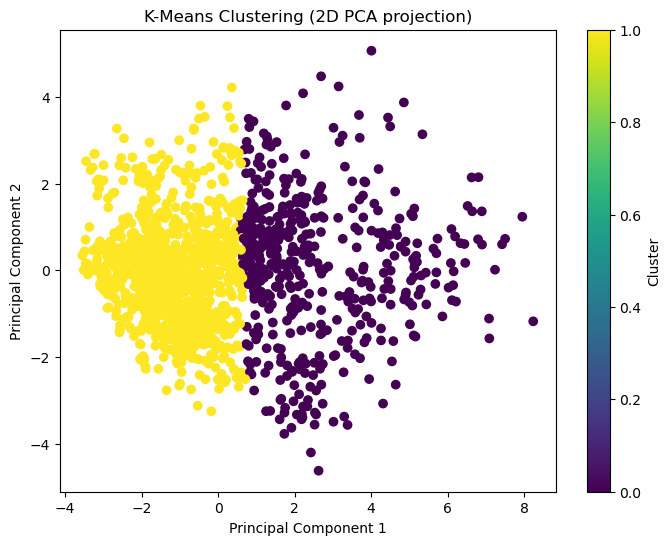

Cluster Centers (Centroids):
[[ 6.43407533e-01 -1.06602890e-02  2.27705019e-03  1.67474358e-01
   0.00000000e+00 -3.19044966e-02  4.61084596e-02 -1.54064319e-02
   8.93403154e-03  1.00796700e+00  1.65664362e-02  9.73368544e-01
   3.33467431e-02  4.00661945e-02 -3.70854184e-02  7.40065558e-04
   1.63880782e-02  0.00000000e+00  7.10891845e-02  9.96918122e-01
  -1.45317701e-02  2.44345167e-02  9.37011595e-01  9.20521088e-01
   7.82627829e-01  8.72193935e-01  1.79324895e-01  7.13080169e-01
   6.22362869e-01  3.41772152e-01  4.17721519e-01  1.26582278e-01
   3.01687764e-01  5.06329114e-02  8.64978903e-02  5.82278481e-01
   1.26582278e-02  5.48523207e-02  2.04641350e-01  1.28691983e-01
   1.49789030e-01  5.48523207e-02  2.65822785e-01  4.21940928e-03
   5.12658228e-01  2.55274262e-01  2.72151899e-01]
 [-3.06199970e-01  5.07327008e-03 -1.08365642e-03 -7.97016521e-02
   0.00000000e+00  1.51834653e-02 -2.19431826e-02  7.33197661e-03
  -4.25173790e-03 -4.79695139e-01 -7.88402685e-03 -4.63229608e

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.dropna(inplace=True)
y = df['Attrition']
X = df.drop(columns=['Attrition'])

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

kmeans_pipeline.fit(X)

labels = kmeans_pipeline.named_steps['kmeans'].labels_
df['Cluster'] = labels

print("Clustered Data:")
print(df[['Attrition', 'Cluster']].head())

inertia = kmeans_pipeline.named_steps['kmeans'].inertia_
print(f"Inertia: {inertia}")

silhouette_avg = silhouette_score(preprocessor.transform(X), labels)
print(f"Silhouette Score: {silhouette_avg}")

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='Clusters')
plt.title("K-Means Clustering (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

centroids = kmeans_pipeline.named_steps['kmeans'].cluster_centers_
print("Cluster Centers (Centroids):")
print(centroids)
